# Visualización con Matplotlib: Scatter Plots (Diagramas de dispersión)

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

### Gráficos de dispersión con ``plt.plot`` y ``ax.plot``

En la sesión anterior, vimos ``plt.plot``/``ax.plot`` para producir gráficos de líneas.
Resulta que esta misma función también puede producir gráficos de dispersión, con sólo cambiar algunos argumentos:


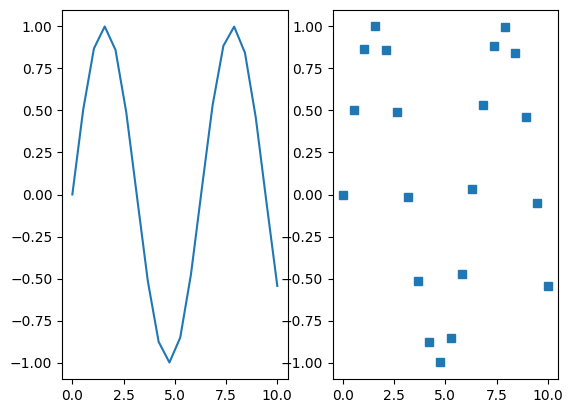

In [2]:
x = np.linspace(0, 10, 20) #---> de 0 a 10 con 20 puntos
y = np.sin(x)

fig, ax = plt.subplots(1, 2)
ax[0].plot(x, y, "-")
ax[1].plot(x, y, "s"); #---> "s" lo entiende como un marcador de puntos (los 20 indicados en linspace)

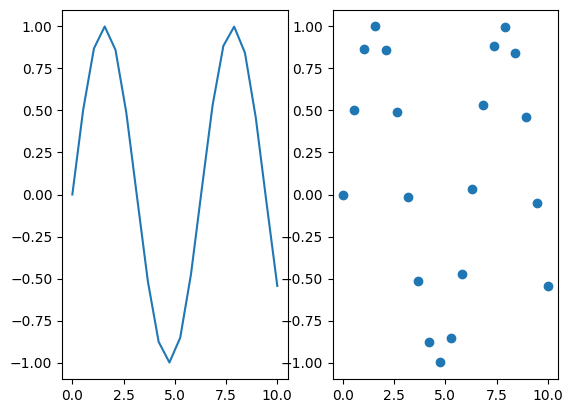

In [3]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(x, y, "-")
ax[1].plot(x, y, "o"); #---> "o" también lo entiende como un marcador de puntos

El tercer argumento en la llamada a la función es un carácter que representa el tipo de símbolo utilizado para el trazado. Al igual que puedes especificar opciones como ``'-'``, ``'--'`` para controlar el estilo de línea, el estilo del marcador tiene su propio conjunto de códigos de cadena cortos.  

La lista completa de símbolos disponibles se puede ver en la [documentación de ``plt.plot``](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), o en la documentación en línea de Matplotlib. La mayoría de las posibilidades son bastante intuitivas, y mostraremos algunos de los más comunes aquí:

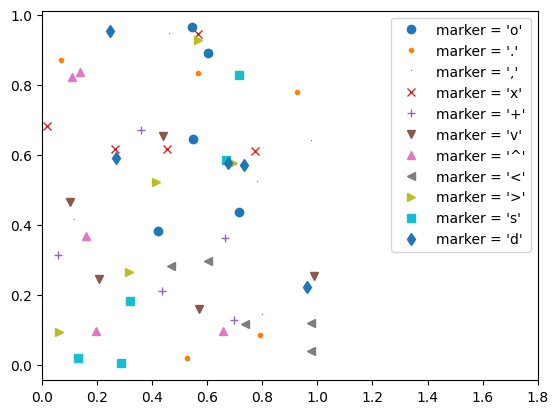

In [4]:
markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
rng = np.random.RandomState(0)
for marker in markers:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label=f"marker = '{marker}'")
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Para aún más posibilidades, estos códigos de caracteres pueden ser utilizados junto con códigos de línea y color para trazar puntos junto con una línea que los conecte:

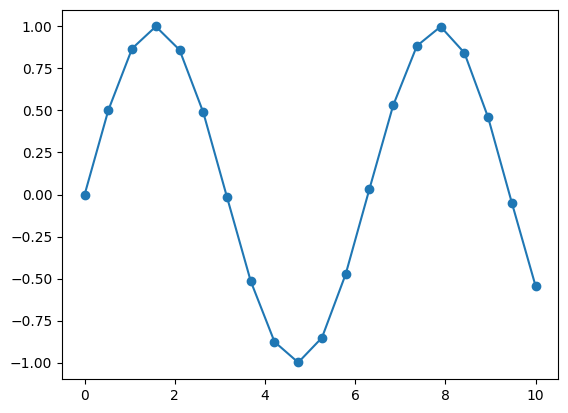

In [5]:
plt.plot(x, y, "-o");

### Gráficos de dispersión con ``plt.scatter`` y ``ax.scatter``

Un segundo método más potente para crear gráficos de dispersión es la función ``plt.scatter``, que se puede usar de manera muy similar a la función ``plt.plot`` y que es el que se usa en las funciones que empleamos en los análisis:


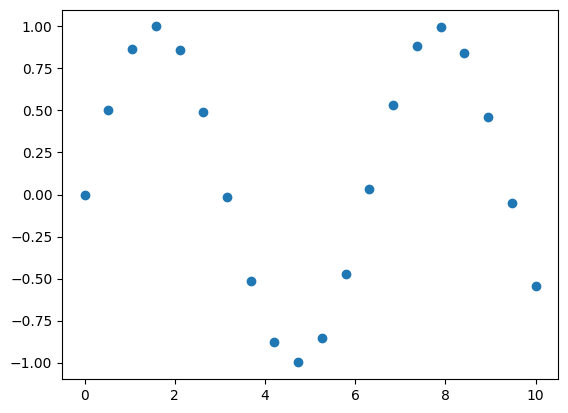

In [6]:
plt.scatter(x, y);


**La diferencia principal de ``plt.scatter`` con ``plt.plot`` es que se puede utilizar para crear gráficos de dispersión donde las propiedades de cada punto individual (tamaño, color de relleno, color de borde, etc.) pueden ser controladas individualmente o asignadas a datos.** De hecho, gracias a esto creamos los diagramas de burbujas donde el tamaño de los puntos depende de una tercera variable.

Veámoslo creando un gráfico de dispersión aleatorio con puntos de muchos colores y tamaños.
Para poder ver mejor los resultados superpuestos, también usaremos la palabra clave ``alpha`` para ajustar el nivel de transparencia:


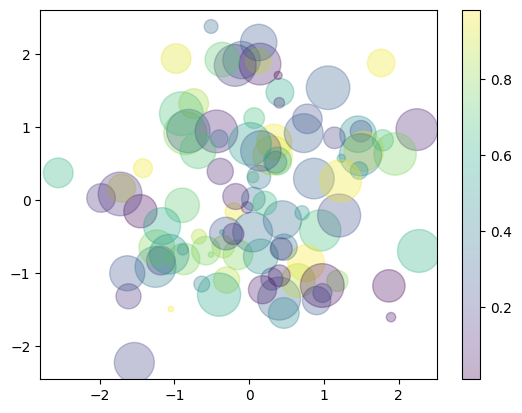

In [7]:
rng = np.random.RandomState(0)
plt.grid(False)
x = rng.randn(100) # edades
y = rng.randn(100) # alturas
colors = rng.rand(100) # pais
sizes = 1000 * rng.rand(100) # numero personas

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, #--> alpha = nivel de transparencia
            cmap='viridis');
plt.colorbar();

Para verlo con un dataset real, usemos otro de los dataset "hello, world" junto con el del titanic, el iris dataset, en el que vamos a mostrar las gráficas de tres tipos de flores de la misma familia enfrentando la longitud del pétalo y del sépalo y pintando cada tipo de flor de un color, y regulando el tamaño de los puntos con el ancho del sépalo:

In [8]:
df_iris = pd.read_csv("./data/iris.csv")
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_class
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


Text(0, 0.5, 'petal lenght (cm)')

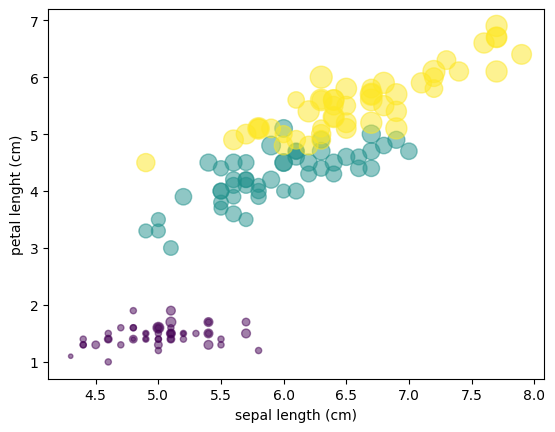

In [9]:
plt.scatter(df_iris["sepal length (cm)"], df_iris["petal length (cm)"], c = df_iris.target, alpha = 0.5, s= 100* df_iris["petal width (cm)"])
plt.xlabel("sepal length (cm)")
plt.ylabel("petal lenght (cm)")

# c = color ; s = tamaño
# En este caso el color está determinado por el tipo de planta, y el tamaño por el tamaño del pétalo

Podemos ver que este gráfico de dispersión nos ha dado la capacidad de **explorar simultáneamente cuatro dimensiones diferentes de los datos:**
la ubicación (x, y) de cada punto corresponde a la longitud y anchura del sépalo, el tamaño del punto está relacionado con la anchura del pétalo, y el color está relacionado con la especie particular de flor.
Gráficos de dispersión multicolores y multifuncionales como este pueden ser útiles tanto para la exploración como para la presentación de datos.

Nos lo apuntamos para enriquecer nuestra biblioteca de funciones...

# Visualización con Matplotlib: Histogramas y diagramas de caja

In [10]:
data = np.random.randn(1000)

Vamos a ver de forma sencilla como hacer los gráficos que nos generaban las funciones que empleamos en las visualizaciones analiticas del sprint anteior. En concreto, veremos los histogramas y los boxplots:

### Histogramas

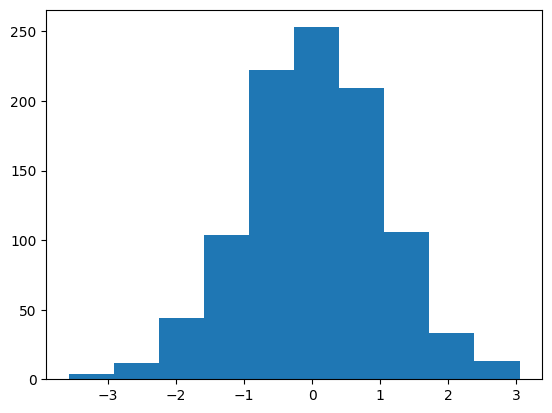

In [11]:
plt.hist(data);

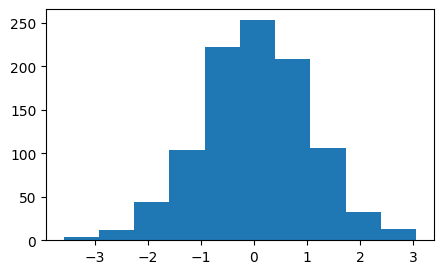

In [12]:
fig = plt.figure(figsize= (5,3)) #---> figsize = Ancho x Alto en pulgaddas
ax = plt.axes()
ax.hist(data);

La función ``hist()`` tiene muchas opciones para ajustar tanto el cálculo como la visualización; aquí tienes un ejemplo de un histograma más personalizado (en el que tocamos el número de columnas `bins`, la transparencia y el color):


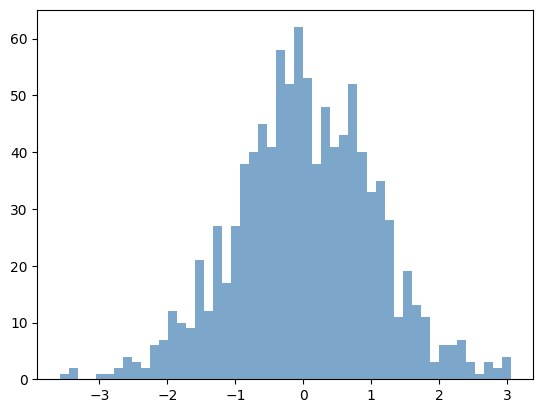

In [13]:
plt.hist(data,
         bins = 50,            #--> Número de barras
         alpha = 0.7,          #--> Transparencia ; sin transparencia: alpha = 1
         color = "steelblue"); #--> Color

La transparencia es particularmente interesante para comparar histogramas o mostrar dicha comparación (y aprovecho para enseñarte un truco para cuando tengas argumentos repetidos que poner en tus llamadas a función):

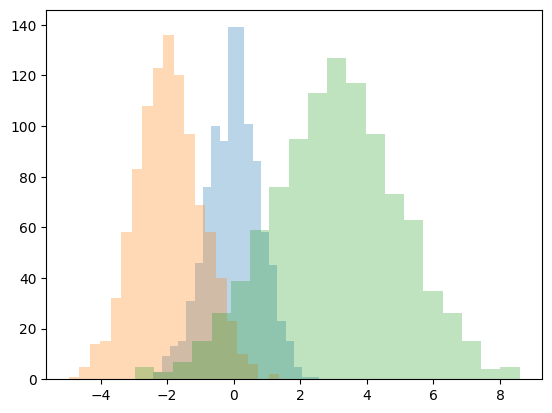

In [14]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(alpha = 0.3, bins = 20) #--> Para usar los mismos argumentos en diferentes funciones

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Es también el momento de enseñarte a capturar los límites de esos bines:

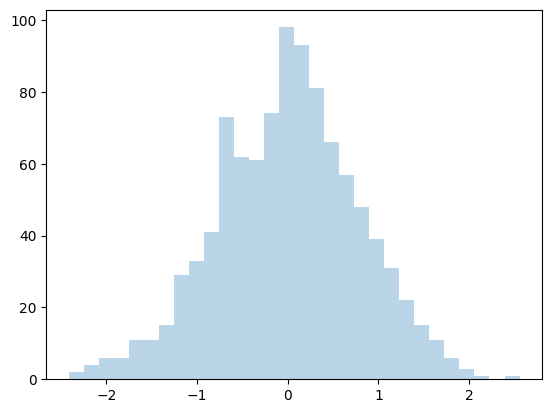

In [15]:
fig = plt.figure()
ax = plt.axes()
limites = ax.hist(x1, alpha = 0.3, bins = 30)

Limites es una tupla en la que el primer valor son los conteos y el segundo los límites de las barras:

In [16]:
limites[0] #--> Conteos

array([ 2.,  4.,  6.,  6., 11., 11., 15., 29., 33., 41., 73., 62., 61.,
       74., 98., 93., 81., 66., 57., 48., 39., 31., 22., 15., 11.,  6.,
        3.,  1.,  0.,  1.])

In [17]:
limites[1] #--> Límites de las barras

array([-2.41703011, -2.25125778, -2.08548544, -1.9197131 , -1.75394076,
       -1.58816842, -1.42239608, -1.25662374, -1.0908514 , -0.92507906,
       -0.75930672, -0.59353438, -0.42776204, -0.2619897 , -0.09621736,
        0.06955498,  0.23532732,  0.40109966,  0.566872  ,  0.73264434,
        0.89841668,  1.06418901,  1.22996135,  1.39573369,  1.56150603,
        1.72727837,  1.89305071,  2.05882305,  2.22459539,  2.39036773,
        2.55614007])


### Boxplots

Los diagramas de caja eran esos diagramas en los que resumíamos las medidas de posición y añadíamos una posible formar de obtener valores anómalos, extremos o outliers. En forma de diagrama:


```text
     Q1-1.5IQR   Q1  mediana  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers/outlier
                       IQR

```

Donde IQR es el rango intercuartilico (la diferencia entre el valor de Q3 o tercer cuartil o percentil-75 y el valor de Q1 o primer cuartil, o percentil-25)

En matplotlib:

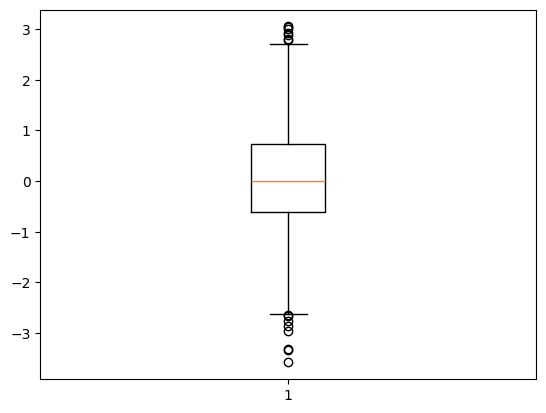

In [18]:
plt.boxplot(data, whis = 1.5);

En el caso de matplotlib empleamos por defecto diagramas de caja verticales. Pero podemos cambiarlo:

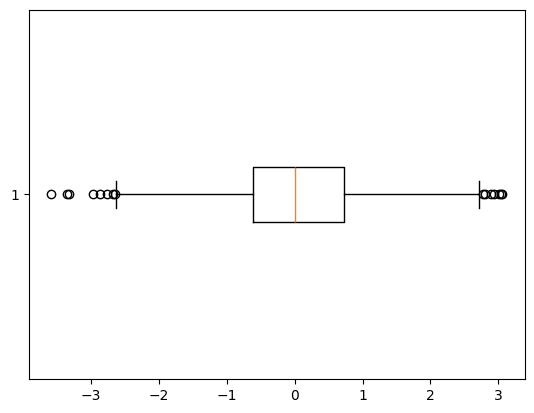

In [19]:
plt.boxplot(data, vert = False);

Y podemos mostrar varios juntos:

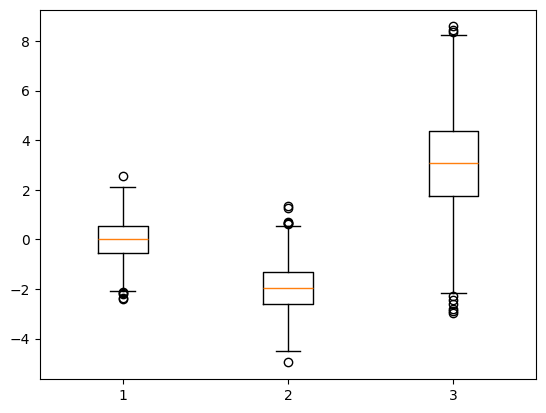

In [20]:
plt.boxplot([x1, x2, x3]);

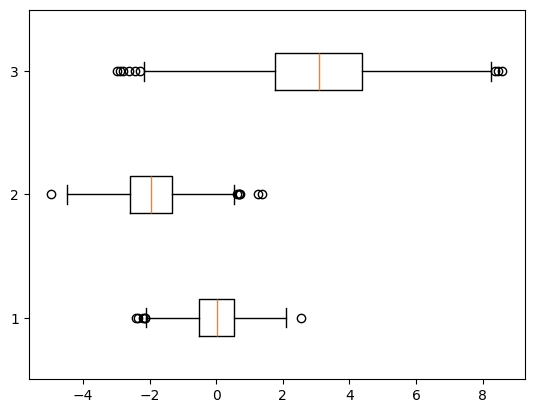

In [21]:
plt.boxplot([x1, x2, x3], vert = False);

# Visualización con Matplotlib: Diagramas de barras y visualización de errores

In [22]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Graficos de Barras y Count plots

Los gráficos de barras se emplean para comparar datos de forma más general y cuando se emplean para comparar frecuencias también reciben el nombre de Count plots. La sintaxis del gráfico de barras en matplotlib es muy sencilla:

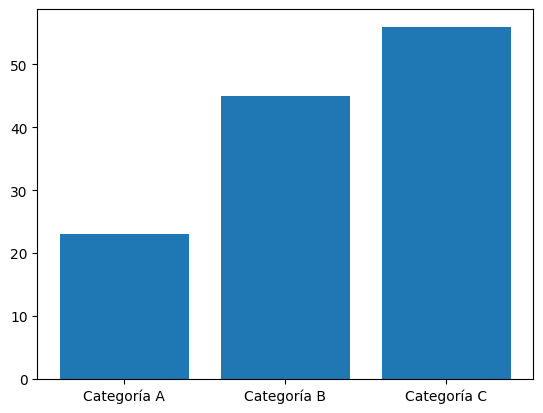

In [23]:
# Datos de ejemplo
categorias = ['Categoría A', 'Categoría B', 'Categoría C']
valores = [23, 45, 56]

# Crear gráfico de barras
plt.bar(categorias, valores);

Pero si queremos obtener un gráfico de frencuencias le tenemos que dar estas calculadas, veamos como sería el gráfico de frecuencias absolutas y de frecuencias relativas para la columna "who" del titanic, empleando ya algunos de nuestros aprendizajes:

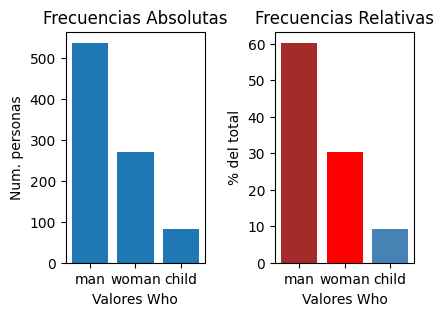

In [24]:
# frecuencias absolutas
categorias = df_titanic.who.value_counts().index.to_list()
frecuencias = df_titanic.who.value_counts().to_list()
frec_relativas = (df_titanic.who.value_counts(normalize = True) * 100).to_list()

fig,ax = plt.subplots(1,2, figsize = (4.5,3))
fig.subplots_adjust(wspace = 0.5)

ax[0].bar(categorias, frecuencias)
ax[0].set_title("Frecuencias Absolutas")
ax[0].set_xlabel("Valores Who")
ax[0].set_ylabel("Num. personas")

ax[1].bar(categorias, frec_relativas, color = ["brown","red","steelblue"])
ax[1].set_title("Frecuencias Relativas")
ax[1].set_xlabel("Valores Who")
ax[1].set_ylabel("% del total");

### Visualizando Errores


En general, si no vas a hacer un análisis de datos de mediciones no vas a necesitar este tipo de gráficas, pero son muy comunes en ámbitos científicos y para representar medidas que por las condiciones de medición o de los aparatos de medida quieren presentar el posible rango de error que se haya podido cometer al tomarlas. Por ejemplo si necesitamos mucha precisión en la medida de la velocidad de un objeto en un experimento de física y nuestro aparato de medida dice 5 pero también que comete un error de 0.05, lo normal es representar ese 5 como un punto y una barra, denominada barra de error, centrada en la medida y de extremos el resultado de restar y sumar el error (en este caso entre 4.5 y 5.5, resultado de restar 0.05 y sumar 0.05)



En la visualización de datos y resultados, mostrar estos errores de manera efectiva puede hacer que una gráfica transmita mucha más información completa.


Cómo se muestran barras de error básico en matplotlib:

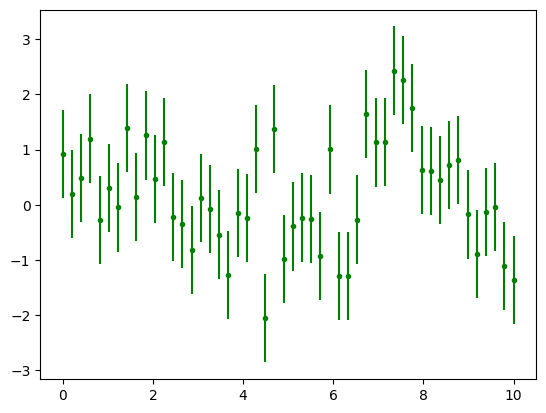

In [25]:
x = np.linspace(0, 10, 50)
dy = 0.8 # el error de nuestro aparato de medida
y = np.sin(x) + dy * np.random.randn(50) # una función inventada con ese error (aleatorio por medida)

plt.errorbar(x, y, yerr=dy, fmt='.g');

Además de estas opciones básicas, la función ``errorbar`` tiene muchas opciones para ajustar finamente las salidas.
Usando estas opciones adicionales, puedes personalizar fácilmente la estética de tu gráfico de barras de error.
A menudo encuentro útil, especialmente en gráficos concurridos, hacer que las barras de error sean más claras que los propios puntos:

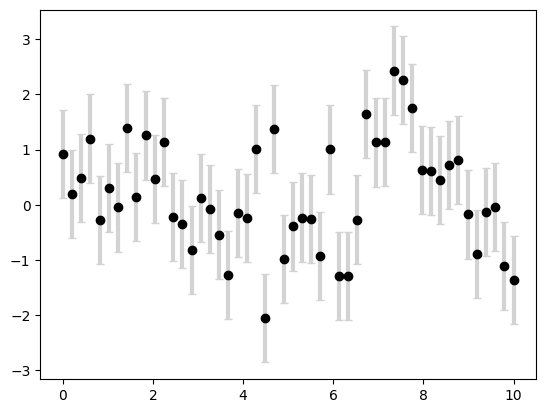

In [26]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=3);

Existen muchas más opciones, que puedes encontrar en la documentación de `plt.errorbar`, pero por lo menos tienes la forma más sencilla de mostrar errores si esa es tu necesidad.


# Visualización con Matplotlib: Algunos elementos de apoyo

### Manipulando leyendas


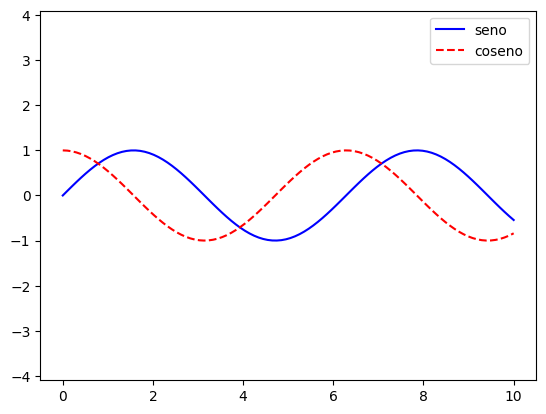

In [31]:
x = np.linspace(0,10,100)
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), "-b", label = "seno")
ax.plot(x, np.cos(x), "--r", label = "coseno")
ax.axis("equal") #--> Ejes con el mismo tamaño
ax.legend();

Y vamos a ver como:
* Ponerle título, con el argumento `title`
* Cambiar la posición de la leyenda, con el argumento `loc`
* Quitar el marco y ponerlo con el argumento `frameon`
* Indicar el núméro de columnas de la leyenda con `ncol`

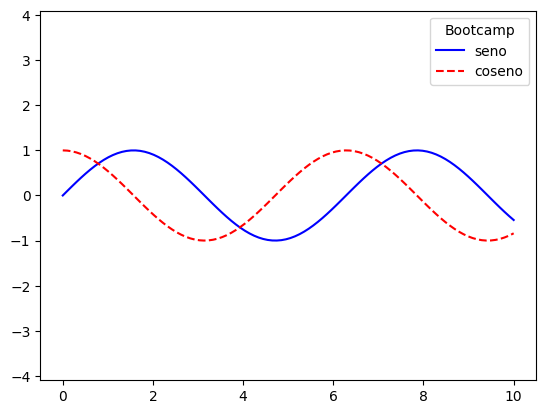

In [33]:
# Titulo

ax.legend(loc = "upper right", title = "Bootcamp")
fig

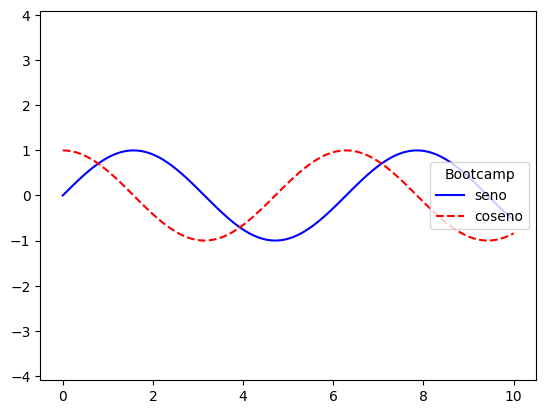

In [34]:
# Centro arriba, abajo izquierda, best

ax.legend(loc = "center right", title = "Bootcamp")
fig

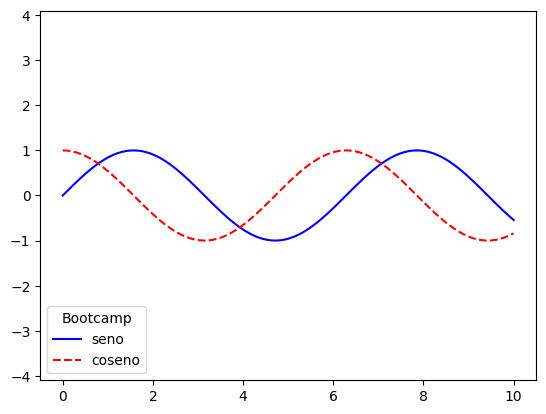

In [36]:
ax.legend(loc = "lower left", title = "Bootcamp")
fig

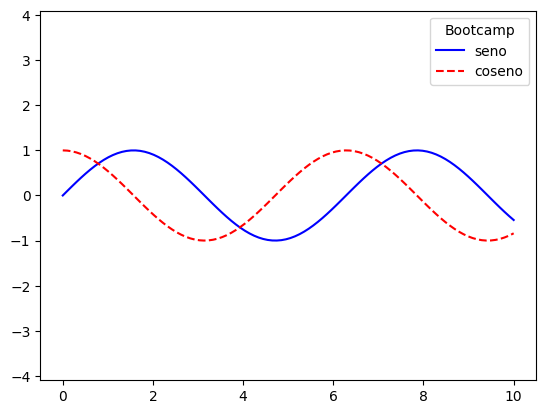

In [37]:
ax.legend(loc = "best", title = "Bootcamp")
fig

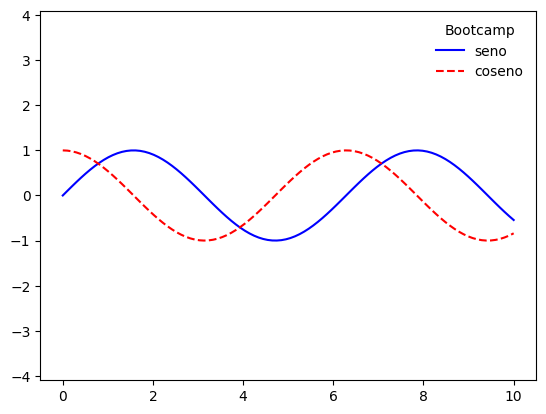

In [38]:
# Sin marco

ax.legend(loc = "best", title = "Bootcamp", frameon = False)
fig

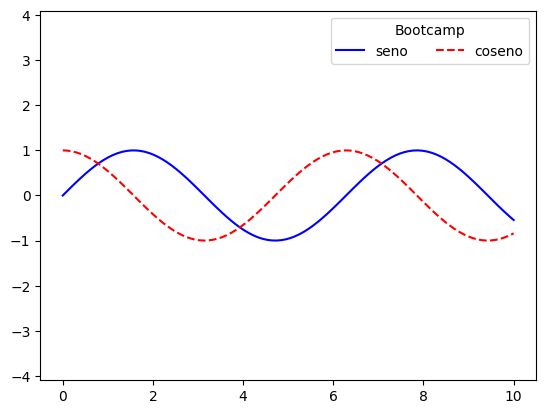

In [39]:
# numero de columnas

ax.legend(loc = "best", title = "Bootcamp", ncol = 2)
fig

#### Truquitos (I): Leyendas para el tamaño de los puntos [y pequeño repaso]

A veces, los valores predeterminados de la leyenda no son suficientes para la visualización dada.
Por ejemplo, tal vez estés utilizando el tamaño de los puntos para marcar ciertas características de los datos, y quieras crear una leyenda que refleje esto.  Además también aprenderemos algo sobre la barra de colores o color bar.

Aquí tienes un ejemplo donde usaremos el tamaño de los puntos para indicar las poblaciones de las ciudades de California.
Nos gustaría una leyenda que especifique la escala de los tamaños de los puntos, y lo lograremos trazando algunos datos etiquetados sin entradas:


In [40]:
# Leer dataframe 

cities = pd.read_csv("./data/california_cities.csv")
cities

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


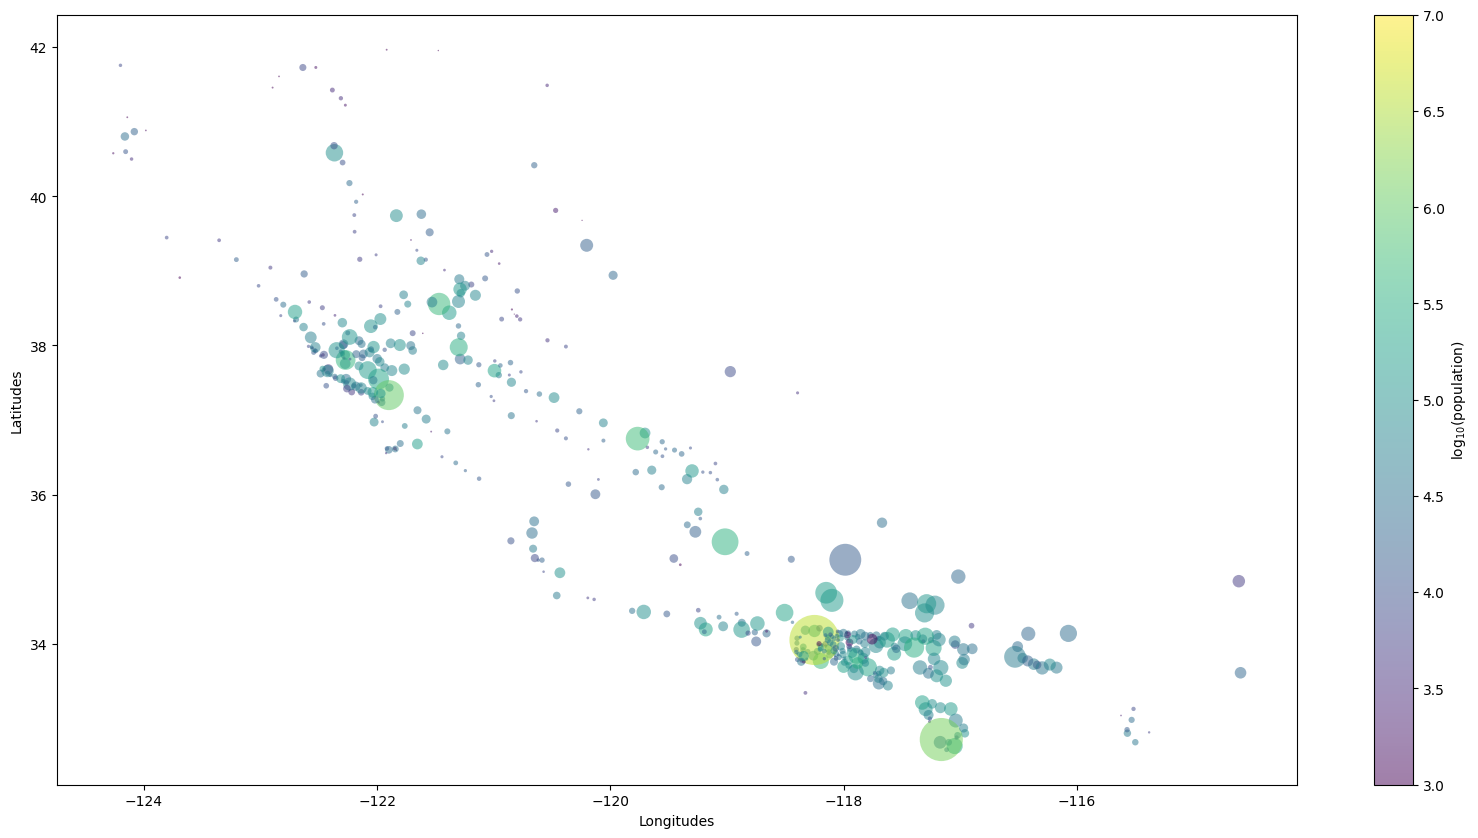

In [46]:
# Dispersion, barra de colores

lat, lon = cities["latd"], cities["longd"]
population, area = cities["population_total"], cities["area_total_km2"]

plt.figure(figsize= (20,10))
plt.scatter(lon, lat, c= np.log10(population), cmap= "viridis",
            s = area, linewidths= 0, alpha = 0.5)

plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.colorbar(label ="log$_{10}$(population)")
plt.clim(3,7)

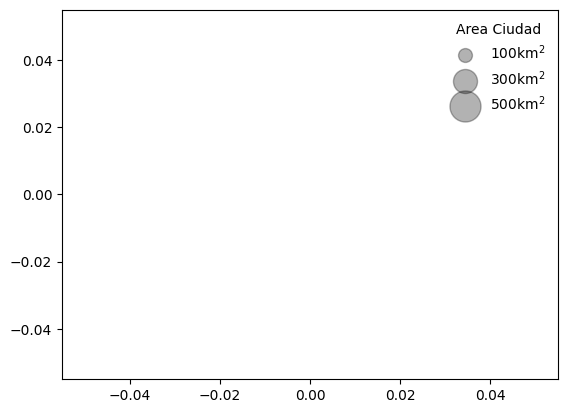

In [48]:
# Fake legend

for area in [100,300,500]:
    plt.scatter([],[], c ="k", alpha = 0.3, s = area, label = str(area) + "km$^2$")
plt.legend(frameon = False, title= "Area Ciudad");

Text(0.5, 1.0, 'Califirnia Cities: Area and Population')

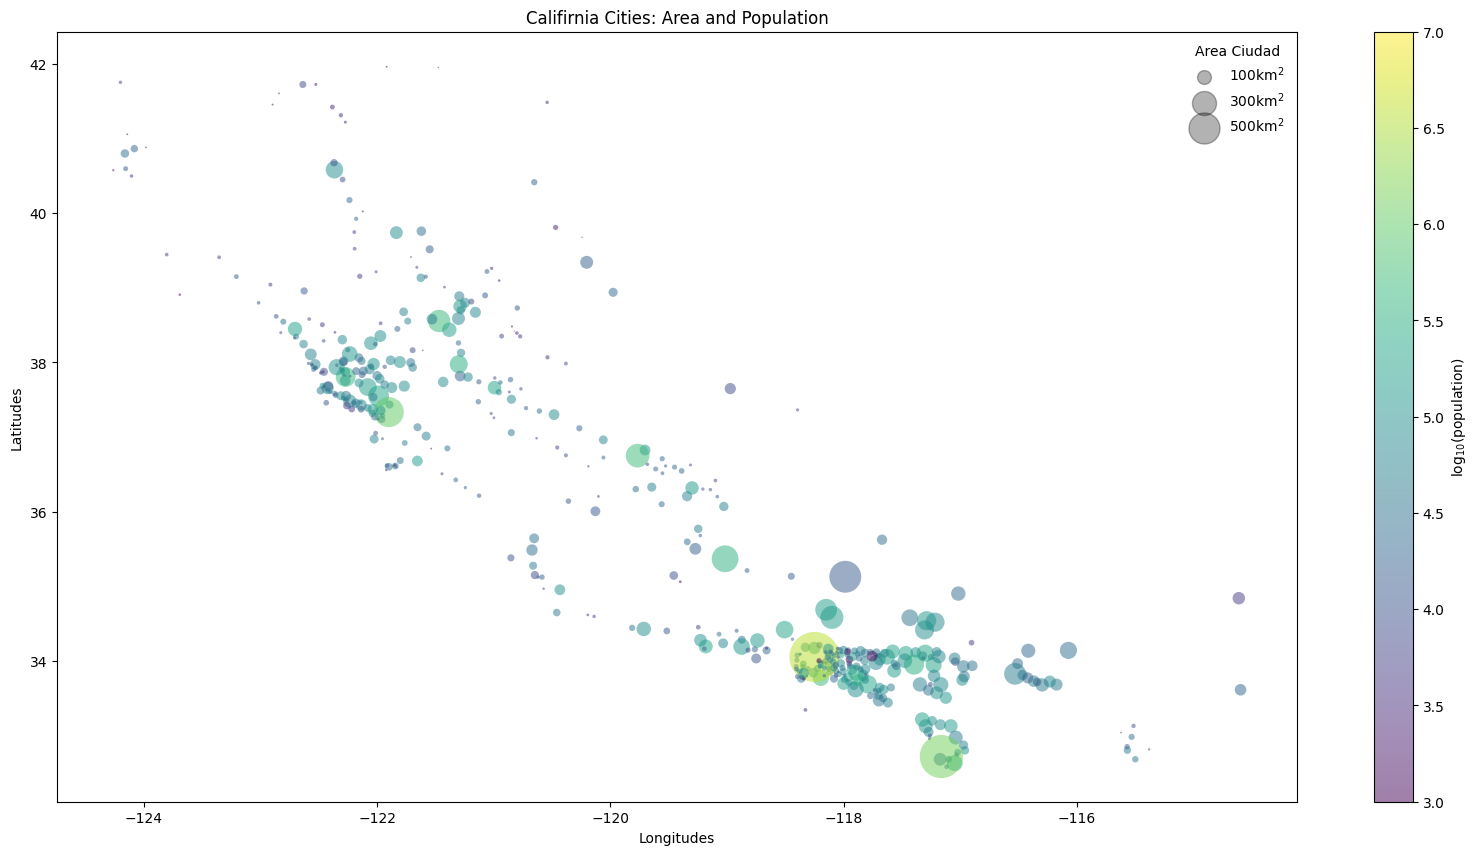

In [50]:
# Todo junto


lat, lon = cities["latd"], cities["longd"]
population, area = cities["population_total"], cities["area_total_km2"]

plt.figure(figsize= (20,10))
plt.scatter(lon, lat, c= np.log10(population), cmap= "viridis",
            s = area, linewidths= 0, alpha = 0.5)

plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.colorbar(label ="log$_{10}$(population)")
plt.clim(3,7)

for area in [100,300,500]:
    plt.scatter([],[], c ="k", alpha = 0.3, s = area, label = str(area) + "km$^2$")
plt.legend(frameon = False, title= "Area Ciudad");

plt.title("Califirnia Cities: Area and Population")

### Textos, anotaciones y flechas

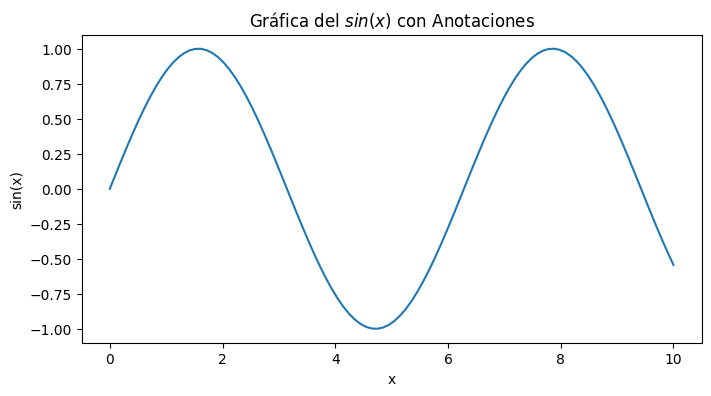

In [52]:
# Generamos una gráfica simple
x = np.linspace(0, 10, 100)
y = np.sin(x)
min_x_value = pd.Series(y, index= x).idxmin()
min_y_value = pd.Series(y, index= x).min()
plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.title(r"Gráfica del $sin(x)$ con Anotaciones")
plt.xlabel("x")
plt.ylabel("sin(x)");


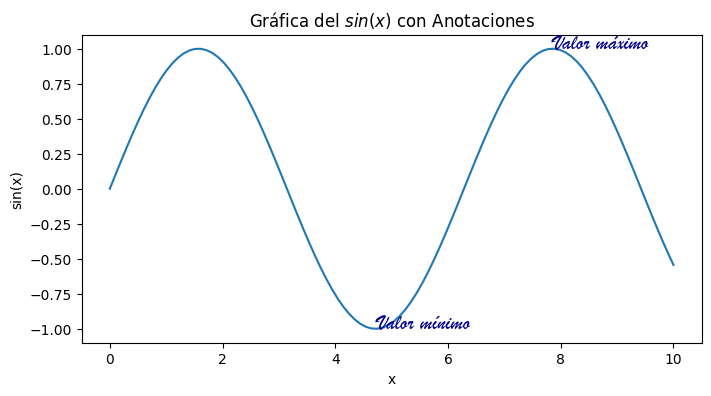

In [60]:
# Añadir texto en la gráfica

min_x_value = pd.Series(y, index= x).idxmin()
max_x_value = pd.Series(y, index = x).idxmax()
min_y_value = pd.Series(y, index= x).min()
max_y_value = pd.Series(y, index= x).max()
plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.title(r"Gráfica del $sin(x)$ con Anotaciones")
plt.xlabel("x")
plt.ylabel("sin(x)");

font_dict = {
    "size": 16,
    "family": "Brush Script MT",
    "color" : "darkblue"
}

plt.text(min_x_value, min_y_value, "Valor mínimo", fontdict= font_dict,)
plt.text(max_x_value, max_y_value, "Valor máximo", fontdict= font_dict,);

[Aquí](https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/) puedes encontrar una lista de fuentes disponibles en Matplotlib (aunque puede que no te fucionen todas). 

Y ahora veamos otra forma de añadir texto con flechas de diversa forma para poder marcar y anotar nuestras gráficas.

#### Flechas y anotaciones

Veamos como añadir una anotación no necesariamente donde se produce y marcar ese punto con una flecha:

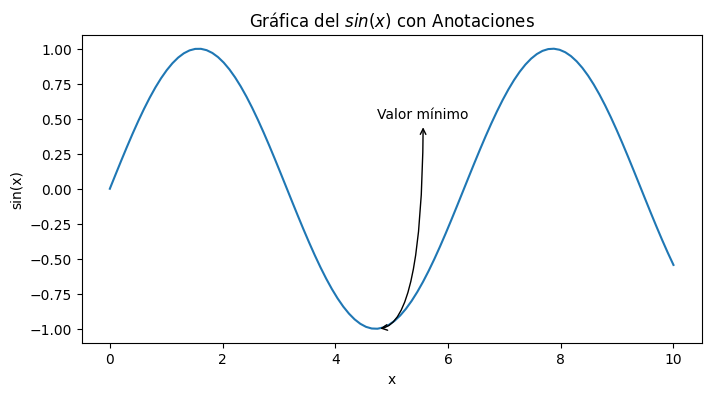

In [74]:
# Repetir la gráfica simple
x = np.linspace(0, 10, 100)
y = np.sin(x)
min_x_value = pd.Series(y, index= x).idxmin()
min_y_value = pd.Series(y, index= x).min()
plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.title(r"Gráfica del $sin(x)$ con Anotaciones")
plt.xlabel("x")
plt.ylabel("sin(x)")

# Añadir antoación con flecha indicativa

props_flecha = {
    "arrowstyle" : "<->",
    "connectionstyle" : "angle3"
}
plt.annotate("Valor mínimo", xy = (min_x_value, min_y_value), xytext = (min_x_value, 0.5), arrowprops = props_flecha);